# ICMarkets demo 

showing analysis of different bots being used on the account, to evaluate performace

In [1]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
from datetime import  timedelta, datetime
import matplotlib.pyplot as plt
plt.style.use('dark_background')


In [2]:
mt5.initialize()

True

showing all the data calling the history deals get function for mt5

In [3]:
mt5.history_deals_get(datetime(2024,1,1),datetime.now(), symbol ="XAUUSD")

(TradeDeal(ticket=1628313, order=0, time=1712597311, time_msc=1712597311046, type=2, entry=0, magic=0, position_id=0, reason=0, volume=0.0, price=0.0, commission=0.0, swap=0.0, profit=6000.0, fee=0.0, symbol='', comment='Initial Deposit', external_id=''),
 TradeDeal(ticket=1629729, order=1818615, time=1712598104, time_msc=1712598104181, type=0, entry=0, magic=0, position_id=1818615, reason=0, volume=0.01, price=2326.77, commission=-0.03, swap=0.0, profit=0.0, fee=0.0, symbol='XAUUSD', comment='', external_id='2555156'),
 TradeDeal(ticket=1629817, order=1818706, time=1712598133, time_msc=1712598133307, type=1, entry=1, magic=0, position_id=1818615, reason=0, volume=0.01, price=2325.54, commission=-0.03, swap=0.0, profit=-1.23, fee=0.0, symbol='XAUUSD', comment='', external_id='2555243'),
 TradeDeal(ticket=1632823, order=1821761, time=1712599920, time_msc=1712599920832, type=0, entry=0, magic=0, position_id=1821761, reason=0, volume=0.01, price=2330.54, commission=-0.03, swap=0.0, profit

Turning the data into a pandas dataframe so it can be analysed

In [4]:
martingale_xau_data = mt5.history_deals_get(datetime(2024,4,1),(datetime.now() + timedelta(hours=3)), symbol ="XAUUSD")
data = {
    'time': [datetime.fromtimestamp(deal.time) for deal in martingale_xau_data],
    'ticket': [deal.ticket for deal in martingale_xau_data],
    'profit': [deal.profit for deal in martingale_xau_data],
    'swap': [deal.swap for deal in martingale_xau_data],
    'volume': [deal.volume for deal in martingale_xau_data],
    'symbol': [deal.symbol for deal in martingale_xau_data]
}
data = pd.DataFrame(data)
martingale_xau = data[data['symbol'] == 'XAUUSD']
martingale_xau = martingale_xau[martingale_xau['profit'] != 0]


Creating equity curve 

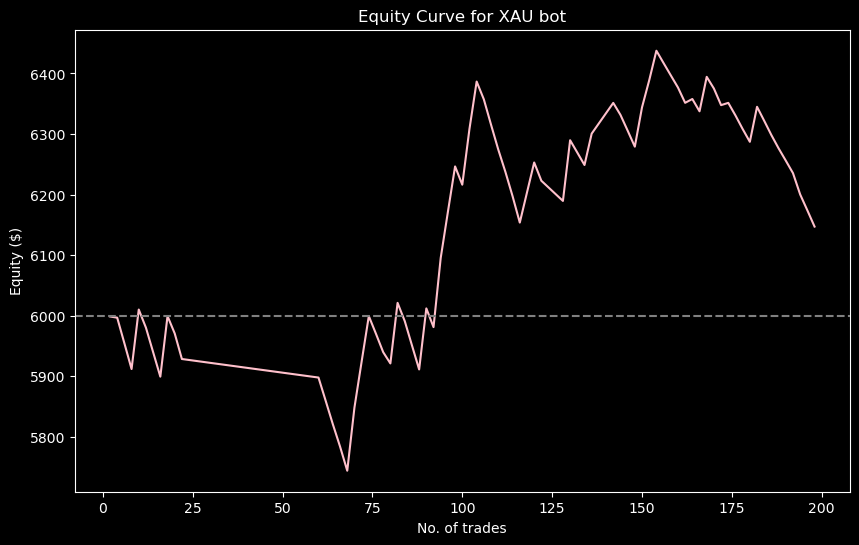

In [5]:
icmarkets = 0 # first week profits on icmarkets
equity = np.cumsum(martingale_xau['profit']) + 6000 
plt.figure(figsize=(10, 6))
plt.plot(martingale_xau.index, equity, color='pink')
plt.axhline(y=6000, color='gray', linestyle='--')  # Add a horizontal dotted line at y=6000
plt.xlabel('No. of trades')
plt.ylabel('Equity ($)')
plt.title('Equity Curve for XAU bot')
plt.grid(False)
plt.show()

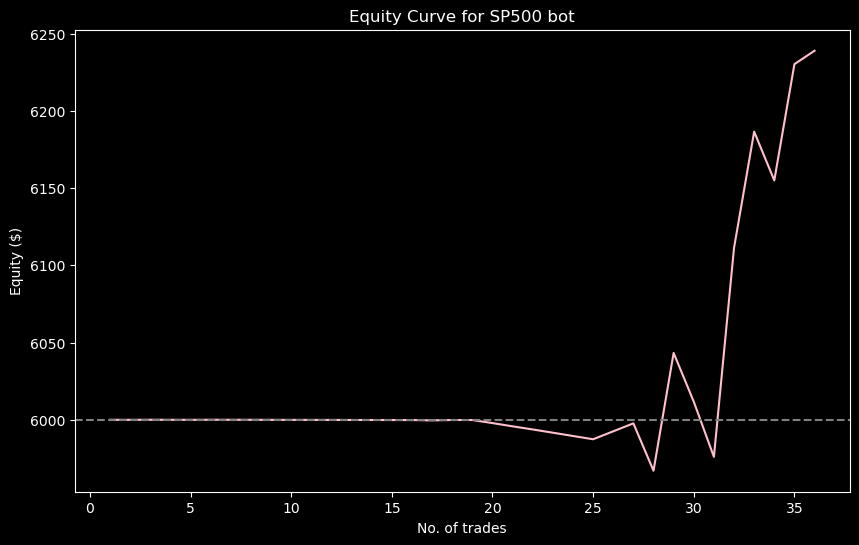

In [6]:

BB_RSI = data[data['symbol'] == 'SP500USD']
BB_RSI = BB_RSI[BB_RSI['profit'] != 0]
# Renumber the index
BB_RSI.reset_index(drop=True, inplace=True)
BB_RSI.index = BB_RSI.index + 1  # Start index from 1 instead of 0

icmarkets = 0 # first week profits on icmarkets
equity = np.cumsum(BB_RSI['profit']) + 6000 
plt.figure(figsize=(10, 6))
plt.plot(BB_RSI.index, equity, color='pink')
plt.axhline(y=6000, color='gray', linestyle='--')  # Add a horizontal dotted line at y=6000
plt.xlabel('No. of trades')
plt.ylabel('Equity ($)')
plt.title('Equity Curve for SP500 bot')
plt.grid(False)
plt.show()

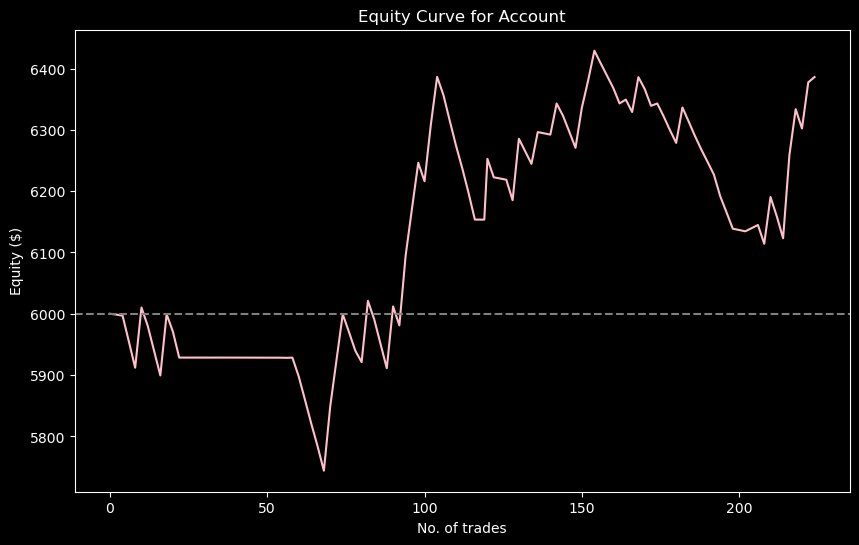

In [7]:
data = data[data['profit'] != 0]
plt.figure(figsize=(10, 6))
plt.plot(data.index, data.profit.cumsum(), color='pink')
plt.axhline(y=6000, color='gray', linestyle='--')  # Add a horizontal dotted line at y=6000
plt.xlabel('No. of trades')
plt.ylabel('Equity ($)')
plt.title('Equity Curve for Account')
plt.grid(False)
plt.show()